In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x shape =  (10,)
y shape =  (10,)


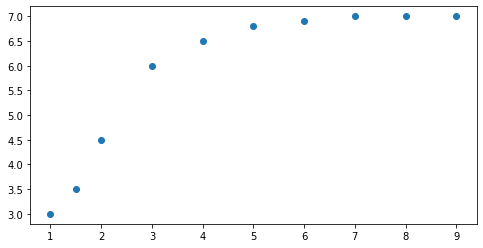

In [2]:
#create dataset
x = np.array([1, 1.5, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([3, 3.5, 4.5, 6, 6.5, 6.8, 6.9, 7, 7, 7])
print ("x shape = ",x.shape)
print ("y shape = ",y.shape)

#plot the data points
plt.figure(figsize=(8, 4))
plt.scatter(x,y)
plt.show()

In [3]:
#convert the features vector into a column vector
x = x.reshape(-1,1) 
print ("x shape = ",x.shape)

x shape =  (10, 1)


In [4]:
x

array([[1. ],
       [1.5],
       [2. ],
       [3. ],
       [4. ],
       [5. ],
       [6. ],
       [7. ],
       [8. ],
       [9. ]])

In [5]:
class LinearRegression:
    
    def __init__(self, l_rate=0.001, iterations=10000):  
        self.l_rate = l_rate  
        self.iterations = iterations
        
    def scale(self, x):  #features scaling using z-score
        x_scaled = x - np.mean(x, axis=0)
        x_scaled = x_scaled / np.std(x_scaled, axis=0)
        return x_scaled

    def fit(self, x, y): 
        self.cost = []  
        self.theta = np.zeros((1 + x.shape[1])) 
        n = x.shape[0]  
        
        x = self.scale(x) #preprocessing step
        
        for i in range(self.iterations):
            y_pred = self.theta[0] + np.dot(x, self.theta[1:])  
            mse = (1/n) * np.sum((y_pred - y)**2)
            self.cost.append(mse) 
            
            #Derivatives
            d_theta1 = (2/n) * np.dot(x.T, (y_pred - y))
            d_theta0 = (2/n) * np.sum(y_pred - y)
            
            #Values update
            self.theta[1:] = self.theta[1:] - self.l_rate * d_theta1
            self.theta[0] = self.theta[0] - self.l_rate * d_theta0                       
        return self    
    
    def predict(self, x):
        
        x = self.scale(x)  #preprocessing step
        
        return self.theta[0] + np.dot(x, self.theta[1:])

In [6]:
#Fitting data points using linear function
lr = LinearRegression()  
lr.fit(x, y) 

In [7]:
# show thetas
lr.theta

array([5.81999999, 1.27652313])

In [8]:
#predict the training examples through Linear function
y_pred = lr.predict(x)

In [9]:
#compute root mean square errors
mse = (1/x.shape[0]) * np.sum((y_pred - y)**2)
rmse = np.sqrt(mse)

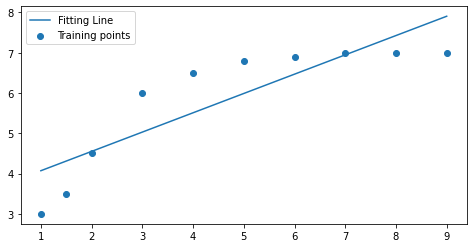

RMSE =  0.7470533455929121


In [10]:
#Plot the results:
plt.figure(figsize=(8, 4))
plt.scatter(x, y, label='Training points')
plt.plot(x, y_pred, label='Fitting Line')
plt.legend(loc='upper left')
plt.show()
print ("RMSE = ",rmse)

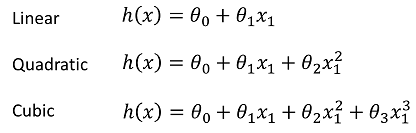


In [11]:
#Bulding a class for Polynomial Linear Regression Using Gradient Descent.
class PolyLinearRegression:
    
    def __init__(self, l_rate=0.001, iterations=10000, degree=2):  
        self.l_rate = l_rate  
        self.iterations = iterations  
        self.degree = degree  #degree of polynomial features
    
    def scale(self, x):  #features scaling using z-score
        x_scaled = x - np.mean(x, axis=0)
        x_scaled = x_scaled / np.std(x_scaled, axis=0)
        return x_scaled
      
    def transformer(self, x ): #Transform data to polynomial features
        self.n = x.shape[0]  #number of training examples
        
        x_transformed = np.empty((self.n, 0))  #empty 2d-array
        
        for j in range( self.degree + 1 ) :
            if j != 0 :
                x_power = np.power( x, j )  #compute x to the power j
                x_transformed = np.append( x_transformed, x_power, axis = 1 ) #fill the aary with x_power as column vectors
        return x_transformed 

    def fit(self, x, y):  
        self.cost = []  
        self.theta = np.zeros((1 + self.degree)) # 1d array
        
        x = self.scale(x)  #preprocessing step 1
        x_p = self.transformer(x)  ##preprocessing step 2
        
        for i in range(self.iterations):
            y_pred = self.theta[0] + np.dot(x_p, self.theta[1:])  
            mse = (1/self.n) * np.sum((y_pred - y)**2)  
            self.cost.append(mse)  
            
            #Derivatives
            d_theta1 = (2/self.n) * np.dot(x_p.T, (y_pred - y)) 
            d_theta0 = (2/self.n) * np.sum(y_pred - y)
            
            #Values update
            self.theta[1:] = self.theta[1:] - self.l_rate * d_theta1
            self.theta[0] = self.theta[0] - self.l_rate * d_theta0                       
        return self
    
    
    def predict(self, x):  
        
        x = self.scale(x)  #preprocessing step 1
        x_p = self.transformer(x)  #preprocessing step 2
        
        return self.theta[0] + np.dot(x_p, self.theta[1:])
    

In [12]:
#Fitting data points using Polynomial function
plr = PolyLinearRegression()  
plr.fit(x, y) 

In [13]:
plr.transformer(x)

array([[ 1.  ,  1.  ],
       [ 1.5 ,  2.25],
       [ 2.  ,  4.  ],
       [ 3.  ,  9.  ],
       [ 4.  , 16.  ],
       [ 5.  , 25.  ],
       [ 6.  , 36.  ],
       [ 7.  , 49.  ],
       [ 8.  , 64.  ],
       [ 9.  , 81.  ]])

In [14]:
# show thetas
plr.theta

array([ 6.66199129,  1.41944591, -0.84766709])

In [15]:
#predict the training examples through polynomial function
y_pred_poly = plr.predict(x)

In [16]:
#compute root mean square errors
mse = (1/x.shape[0]) * np.sum((y_pred_poly - y)**2)
rmse = np.sqrt(mse)

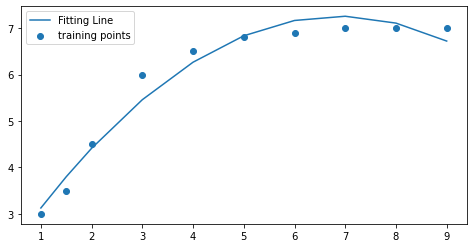

RMSE =  0.26220198490642377


In [17]:
#Plot the results:
plt.figure(figsize=(8, 4))
plt.scatter(x, y, label='training points')
plt.plot(x, y_pred_poly, label='Fitting Line')
plt.legend(loc='upper left')
plt.show()
print ("RMSE = ",rmse)